In [1013]:
import pandas as pd


camino_ds = "../data/loan-prediction-dataset-train.csv"
df = pd.read_csv(camino_ds, delimiter=",")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [1014]:
df.duplicated().sum()

np.int64(0)

In [1015]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [1016]:
from utils.eda_utils import obtener_columnas_categoricas_df, limpiar_cadena

columnas_categoricas = obtener_columnas_categoricas_df(df)


for columna in columnas_categoricas:
    df[columna] = df[columna].apply(limpiar_cadena)

In [1017]:
columnas = df.columns.tolist()

columnas_convertidas_booleanas = []

valores_columnas_booleanas_potenciales = [
    [0, 1],
    [0.0, 1.0],
    ["false", "true"],
    ["No", "Yes"],
    ["no", "yes"],
    ["no", "si"],
    ["N", "Y"],
    ["n", "y"],
]


def _convertir_valor_a_booleano(x):
    if x in [0, 0.0, "false", "no", "No","no", "N", "n"]:
        return False

    if x in [1, 1.0, "true", "yes", "Yes", "si", "Y", "y"]:
        return True

    return x


for columna in columnas:
    valores_unicos = df[columna].dropna().unique()

    columna_booleana_encontrada = False

    if len(valores_unicos) == 2:
        print(f"Valores de columna '{columna}': {str(valores_unicos)}")

        for posibilidad_valores_booleanos in valores_columnas_booleanas_potenciales:
            if set(valores_unicos) == set(posibilidad_valores_booleanos):
                print(f"La columna '{columna}' es booleana. Será convertida.")
                df[columna] = df[columna].apply(_convertir_valor_a_booleano)
                df[columna] = df[columna].astype("bool")

                columna_booleana_encontrada = True
                break

    if columna_booleana_encontrada:
        columnas_convertidas_booleanas.append(columna)


print(f"Columnas convertidas a booleanas: {str(columnas_convertidas_booleanas)}")

Valores de columna 'Gender': ['male' 'female']
Valores de columna 'Married': ['no' 'yes']
La columna 'Married' es booleana. Será convertida.
Valores de columna 'Education': ['graduate' 'not graduate']
Valores de columna 'Self_Employed': ['no' 'yes']
La columna 'Self_Employed' es booleana. Será convertida.
Valores de columna 'Credit_History': [1. 0.]
La columna 'Credit_History' es booleana. Será convertida.
Valores de columna 'Loan_Status': ['y' 'n']
La columna 'Loan_Status' es booleana. Será convertida.
Columnas convertidas a booleanas: ['Married', 'Self_Employed', 'Credit_History', 'Loan_Status']


In [1018]:
columnas_objeto_cadena = df.select_dtypes(include=["object", "string"]).columns.tolist()


for columna in columnas_objeto_cadena:
    valores_unicos = df[columna].dropna().unique().tolist()
    print(f"Valores únicos para columna '{columna}': {str(valores_unicos)}")

Valores únicos para columna 'Loan_ID': ['lp001002', 'lp001003', 'lp001005', 'lp001006', 'lp001008', 'lp001011', 'lp001013', 'lp001014', 'lp001018', 'lp001020', 'lp001024', 'lp001027', 'lp001028', 'lp001029', 'lp001030', 'lp001032', 'lp001034', 'lp001036', 'lp001038', 'lp001041', 'lp001043', 'lp001046', 'lp001047', 'lp001050', 'lp001052', 'lp001066', 'lp001068', 'lp001073', 'lp001086', 'lp001087', 'lp001091', 'lp001095', 'lp001097', 'lp001098', 'lp001100', 'lp001106', 'lp001109', 'lp001112', 'lp001114', 'lp001116', 'lp001119', 'lp001120', 'lp001123', 'lp001131', 'lp001136', 'lp001137', 'lp001138', 'lp001144', 'lp001146', 'lp001151', 'lp001155', 'lp001157', 'lp001164', 'lp001179', 'lp001186', 'lp001194', 'lp001195', 'lp001197', 'lp001198', 'lp001199', 'lp001205', 'lp001206', 'lp001207', 'lp001213', 'lp001222', 'lp001225', 'lp001228', 'lp001233', 'lp001238', 'lp001241', 'lp001243', 'lp001245', 'lp001248', 'lp001250', 'lp001253', 'lp001255', 'lp001256', 'lp001259', 'lp001263', 'lp001264', 

In [1019]:
df.drop("Loan_ID", axis=1, inplace=True)

In [1020]:
# Se elige el 5% como valor para empezar a considerar una columna como categórica.
# Si se supera esta cantidad la columna se dejará como cadena.
porcentaje_max_columnas_categoricas = 0.05
cant_filas_df = df.shape[0]

columnas_a_excluir = []
columnas_convertidas_a_categoricas = []
columnas_convertidas_a_string = []

columnas_objeto_cadena = df.select_dtypes(include=["object", "string"]).columns.tolist()

for columna in columnas_objeto_cadena:
    valores_unicos = df[columna].dropna().unique().tolist()
    print(f"Cant. únicos para columna '{columna}': {len(valores_unicos)}")
    if len(valores_unicos) <= (porcentaje_max_columnas_categoricas * cant_filas_df):
        
        print(f"Valores únicos columna '{columna}': {str(valores_unicos)}")
        print(f"Se procede a convertir la columna '{columna}' a categórica")
        df[columna] = df[columna].astype("category")
        columnas_convertidas_a_categoricas.append(columna)
    else:
        print(f"No se convierte la columna '{columna}' a categórica, se opta por dejarla como string")
        df[columna] = df[columna].astype("string")
        columnas_convertidas_a_string.append(columna)

    del valores_unicos

print("\n")
print(f"Cant. de columnas analizadas: {len(columnas_objeto_cadena)}")
print(f"Cant. de columnas convertidas a category: {len(columnas_convertidas_a_categoricas)}")
print(f"Cant. de columnas convertidas a string: {len(columnas_convertidas_a_string)}")
print(f"Columnas convertidas a categóricas: {str(columnas_convertidas_a_categoricas)}")
print(f"Columnas convertidas a string: {str(columnas_convertidas_a_string)}")

Cant. únicos para columna 'Gender': 2
Valores únicos columna 'Gender': ['male', 'female']
Se procede a convertir la columna 'Gender' a categórica
Cant. únicos para columna 'Dependents': 4
Valores únicos columna 'Dependents': ['0', '1', '2', '3+']
Se procede a convertir la columna 'Dependents' a categórica
Cant. únicos para columna 'Education': 2
Valores únicos columna 'Education': ['graduate', 'not graduate']
Se procede a convertir la columna 'Education' a categórica
Cant. únicos para columna 'Property_Area': 3
Valores únicos columna 'Property_Area': ['urban', 'rural', 'semiurban']
Se procede a convertir la columna 'Property_Area' a categórica


Cant. de columnas analizadas: 4
Cant. de columnas convertidas a category: 4
Cant. de columnas convertidas a string: 0
Columnas convertidas a categóricas: ['Gender', 'Dependents', 'Education', 'Property_Area']
Columnas convertidas a string: []


In [1021]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Gender             601 non-null    category
 1   Married            614 non-null    bool    
 2   Dependents         599 non-null    category
 3   Education          614 non-null    category
 4   Self_Employed      614 non-null    bool    
 5   ApplicantIncome    614 non-null    int64   
 6   CoapplicantIncome  614 non-null    float64 
 7   LoanAmount         592 non-null    float64 
 8   Loan_Amount_Term   600 non-null    float64 
 9   Credit_History     614 non-null    bool    
 10  Property_Area      614 non-null    category
 11  Loan_Status        614 non-null    bool    
dtypes: bool(4), category(4), float64(3), int64(1)
memory usage: 24.7 KB


In [1022]:
from utils.eda_utils import obtener_estadisticas_datos_nulos


estadisticas_datos_nulos = obtener_estadisticas_datos_nulos(df)
estadisticas_datos_nulos[estadisticas_datos_nulos["Na en q"] > 0]

,datos sin NAs en q,Na en q,Na en %
LoanAmount,592,22,3.58
Dependents,599,15,2.44
Loan_Amount_Term,600,14,2.28
Gender,601,13,2.12


In [1023]:
from utils.eda_utils import obtener_estadisticas_descriptivas_df


obtener_estadisticas_descriptivas_df(df).T

,count,min,max,mean,std,median,variation_coefficient
ApplicantIncome,614.0,150.0,81000.0,5403.459283,6109.041673,3812.5,1.130580
CoapplicantIncome,614.0,0.0,41667.0,1621.245798,2926.248369,1188.5,1.804938
LoanAmount,592.0,9.0,700.0,146.412162,85.587325,128.0,0.584564
Loan_Amount_Term,600.0,12.0,480.0,342.000000,65.120410,360.0,0.190411


In [1024]:
columnas_a_imputar_promedio = [
    "LoanAmount",
]

columnas_a_imputar_mediana = [
    "Loan_Amount_Term",
]

columnas_a_imputar_moda = [
    "Dependents",
    "Gender",
]

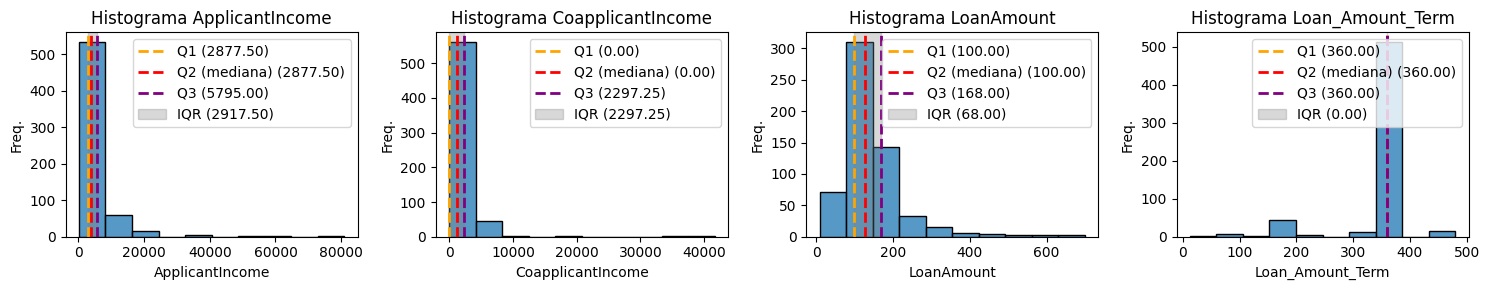

In [1025]:
from utils.eda_utils import graficar_histogramas, obtener_columnas_numericas_df

columnas_numericas = obtener_columnas_numericas_df(df)


graficar_histogramas(df, columnas_numericas, nro_columnas=4, bins=10, figsize=(15, 3))

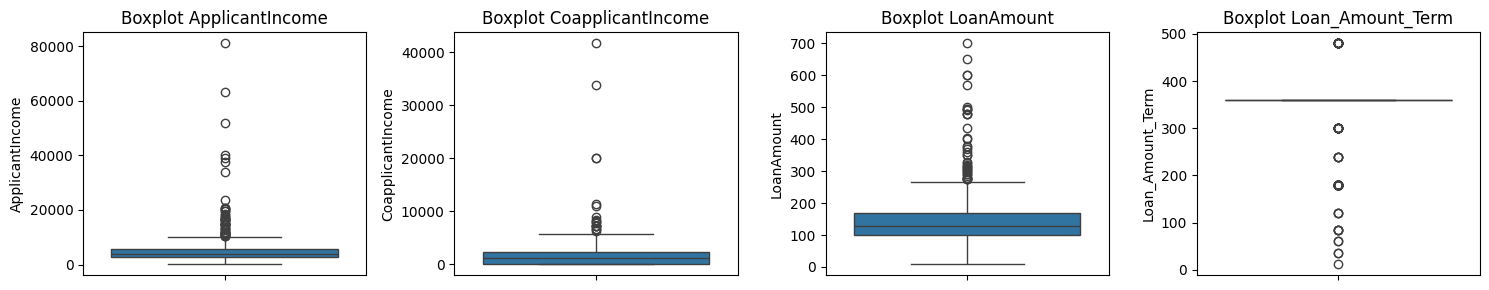

In [1026]:
from utils.eda_utils import graficar_boxplots


graficar_boxplots(df, columnas_numericas, nro_columnas=4, figsize=(15, 3))

In [1027]:
df["Loan_Status_Convertido"] = df["Loan_Status"].apply(lambda x: 1 if x else 0)

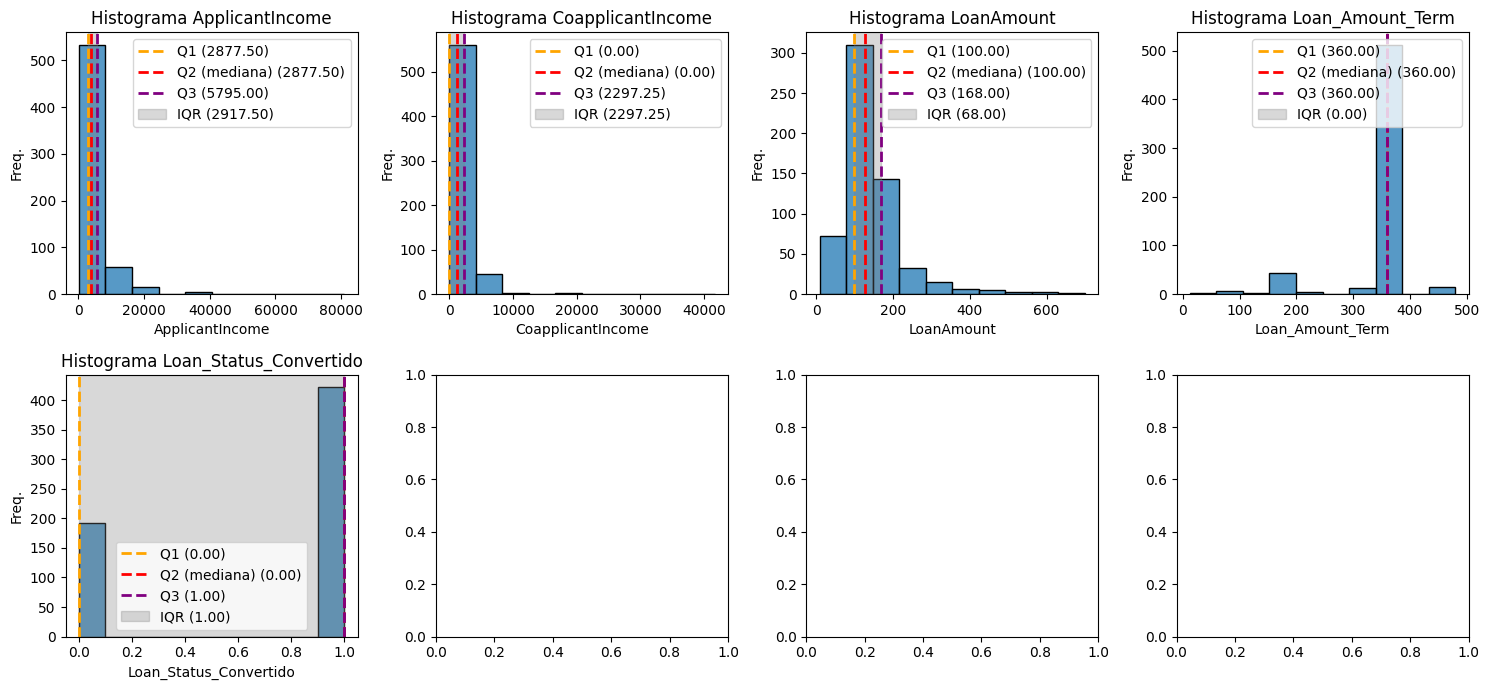

In [1028]:
graficar_histogramas(df, columnas_numericas + ["Loan_Status_Convertido"], nro_columnas=4, bins=10, figsize=(15, 7))

In [1029]:
df.groupby(["Loan_Status"]).count()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status_Convertido
Loan_Status,,,,,,,,,,,,
False,187,192,186,192,192,192,192,181,186,192,192,192
True,414,422,413,422,422,422,422,411,414,422,422,422


In [1030]:
from utils.eda_utils import obtener_datos_outliers_df


obtener_datos_outliers_df(df).T

,Nro. Outliers,Porc. Outliers,Límite mínimo,Límite máximo
ApplicantIncome,50.0,8.143322,-1498.750,10171.250
CoapplicantIncome,18.0,2.931596,-3445.875,5743.125
LoanAmount,39.0,6.587838,-2.000,270.000
Loan_Amount_Term,88.0,14.666667,360.000,360.000
Loan_Status_Convertido,0.0,0.000000,-1.500,2.500


In [1031]:
df["Loan_Amount_Term"].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.116605    0.570909   
CoapplicantIncome        -0.116605           1.000000    0.188619   
LoanAmount                0.570909           0.188619    1.000000   
Loan_Amount_Term         -0.045306          -0.059878    0.039447   

                   Loan_Amount_Term  
ApplicantIncome           -0.045306  
CoapplicantIncome         -0.059878  
LoanAmount                 0.039447  
Loan_Amount_Term           1.000000  


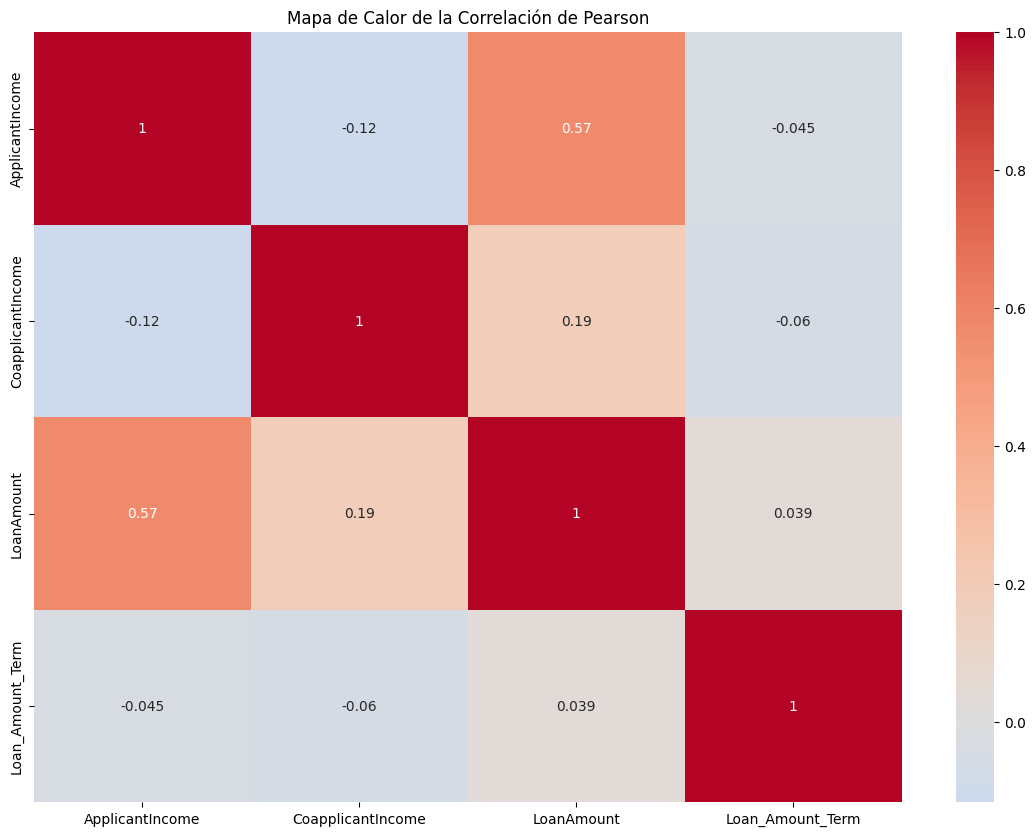

In [1032]:
from utils.eda_utils import graficar_mapa_correlacion


graficar_mapa_correlacion(df, columnas_numericas)

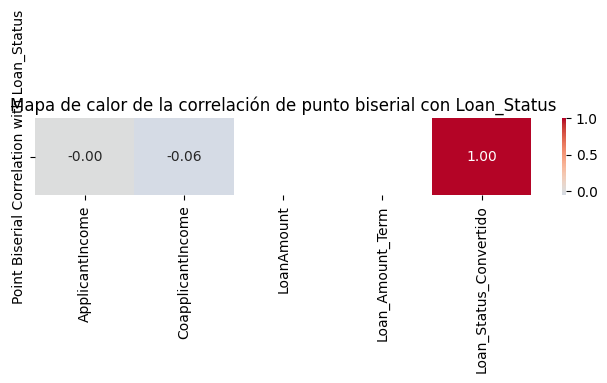

In [1033]:
from scipy.stats import pointbiserialr
import matplotlib.pyplot as plt
import seaborn as sns

columnas_numericas = obtener_columnas_numericas_df(df)
# Calcular la correlación de punto biserial entre Churn y las variables numéricas
churn_corr = {col: pointbiserialr(df['Loan_Status'], df[col])[0] for col in columnas_numericas}
# Convertir el diccionario a un DataFrame para facilitar la visualización
churn_corr_df = pd.DataFrame.from_dict(churn_corr, orient='index', columns=['Point Biserial Correlation with Loan_Status'])
# Graficar el heatmap de las correlaciones de punto biserial
plt.figure(figsize=(8, 1))
sns.heatmap(churn_corr_df.T, annot=True, cmap='coolwarm', center=0, cbar=True, fmt=".2f")
plt.title('Mapa de calor de la correlación de punto biserial con Loan_Status')
plt.show()

In [1034]:
columnas_prediccion = [
    'Gender',
    'Married',
    'Dependents',
    'Education',
    'Self_Employed',
    'ApplicantIncome',
    'CoapplicantIncome',
    'LoanAmount',
    'Loan_Amount_Term',
    'Credit_History',
    'Property_Area',
    # 'Loan_Status'
]

campo_salida = "Loan_Status"

X = df[[*columnas_prediccion]]
y = df[campo_salida]

In [1035]:
mapeo_columnas_ordinales = [
    {
        "col": "Dependents",
        "mapping": [
            "0",
            "1",
            "2",
            "3+",
        ]
    },
    {
        "col": "Education",
        "mapping": [
            "not graduate",
            "graduate",
        ]
    },
]

In [1036]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, RobustScaler


columnas_a_imputar_promedio_sin_verificar = [
    "Loan_Amount_Term"
]

columnas_a_imputar_mediana_sin_verificar = [
    "LoanAmount"
]

columnas_a_imputar_moda_sin_verificar = [
    "Dependents",
    "Gender",
]

columnas_a_imputar_promedio = []

# Sacamos solamente las columnas que fueron seleccionadas para la predicción.
for columna in columnas_a_imputar_promedio_sin_verificar:
    if columna in columnas_prediccion:
        columnas_a_imputar_promedio.append(columna)

columnas_a_imputar_mediana = []

# Sacamos solamente las columnas que fueron seleccionadas para la predicción.
for columna in columnas_a_imputar_mediana_sin_verificar:
    if columna in columnas_prediccion:
        columnas_a_imputar_mediana.append(columna)

columnas_a_imputar_moda = []

# Sacamos solamente las columnas que fueron seleccionadas para la predicción.
for columna in columnas_a_imputar_moda_sin_verificar:
    if columna in columnas_prediccion:
        columnas_a_imputar_moda.append(columna)

categories_ordinal_encoder = []
columnas_ordinal_encoder = []

# Preparamos los parámetros para el Ordinal Encoder.
for mapeo_columna in mapeo_columnas_ordinales:
    nombre_columna = mapeo_columna["col"]

    if nombre_columna in columnas_prediccion:
        mapeo_columnas = mapeo_columna["mapping"]

        categories_ordinal_encoder.append(mapeo_columnas)
        columnas_ordinal_encoder.append(nombre_columna)

columnas_categoricas = obtener_columnas_categoricas_df(df)

columnas_categoricas_a_convertir_onehot = []

# Sacamos solamente las columnas que se requiera convertir a one hot,
# excluyendo las columnas ordinales.
for columna in columnas_categoricas:
    if columna not in columnas_ordinal_encoder and columna in columnas_prediccion:
        columnas_categoricas_a_convertir_onehot.append(columna)

columnas_numericas = obtener_columnas_numericas_df(df)

columnas_numericas_a_escalar = []

# Obtenemos las columnas que requieren escalamiento.
for columna in columnas_numericas:
    if columna in columnas_prediccion:
        columnas_numericas_a_escalar.append(columna)

columnas_a_imputar_moda_onehot = []

for columna in columnas_a_imputar_moda:
    if columna in columnas_categoricas_a_convertir_onehot:
        columnas_a_imputar_moda_onehot.append(columna)

columnas_a_imputar_moda_ordinal = []

for columna in columnas_a_imputar_moda:
    if columna in columnas_ordinal_encoder:
        columnas_a_imputar_moda_ordinal.append(columna)

imputer_mean = ColumnTransformer(
    transformers=[
        ("imputer", SimpleImputer(strategy='mean'), columnas_a_imputar_promedio),
    ],
    remainder="passthrough"
)

imputer_median = ColumnTransformer(
    transformers=[
        ("imputer", SimpleImputer(strategy='median'), columnas_a_imputar_mediana),
    ],
    remainder="passthrough"
)

imputer_mode_onehot = ColumnTransformer(
    transformers=[
        ("imputer", SimpleImputer(strategy='most_frequent'), columnas_a_imputar_moda_onehot),
    ],
    remainder="passthrough"
)

imputer_mode_ordinal = ColumnTransformer(
    transformers=[
        ("imputer", SimpleImputer(strategy='most_frequent'), columnas_a_imputar_moda_ordinal),
    ],
    remainder="passthrough"
)

# Creamos el transformador one hot para las columnas que lo requieran.
transformer_onehot = Pipeline(steps=[
    ("imputer", imputer_mode_onehot),
    ("onehot", OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Creamos el transformador one hot para las columnas que lo requieran.
transformer_ordinal = Pipeline(steps=[
    ("imputer", imputer_mode_ordinal),
    ("ordinal", OrdinalEncoder(categories=categories_ordinal_encoder))
])

imputer_numerical = ColumnTransformer(
    transformers=[
        ("mean", SimpleImputer(strategy='median'), columnas_a_imputar_promedio),
        ("median", SimpleImputer(strategy='median'), columnas_a_imputar_mediana),
    ],
    remainder="passthrough"
)

scaler = Pipeline(steps=[
    ("imputer", imputer_numerical),
    ("std_scaler", RobustScaler()),
])

print(f"Columnas a imputar mediana: {str(columnas_a_imputar_promedio)}")
print(f"Columnas a imputar mediana: {str(columnas_a_imputar_mediana)}")
print(f"Columnas a imputar moda one hot: {str(columnas_a_imputar_moda_onehot)}")
print(f"Columnas a imputar moda ordinal: {str(columnas_a_imputar_moda_ordinal)}")

preprocessor = ColumnTransformer(
    transformers=[
        (
            "scaler",
            scaler,
            columnas_numericas_a_escalar,
        ),
        (
            "ordinal",
            transformer_ordinal,
            columnas_ordinal_encoder,
        ),
        (
            "onehot",
            transformer_onehot,
            columnas_categoricas_a_convertir_onehot,
        ),
    ],
    remainder="passthrough"
)

Columnas a imputar mediana: ['Loan_Amount_Term']
Columnas a imputar mediana: ['LoanAmount']
Columnas a imputar moda one hot: ['Gender']
Columnas a imputar moda ordinal: ['Dependents']


In [1037]:
X_transf = preprocessor.fit_transform(X)

df_transf = pd.DataFrame(X_transf, columns=preprocessor.get_feature_names_out())

df_transf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   scaler__mean__Loan_Amount_Term              614 non-null    float64
 1   scaler__median__LoanAmount                  614 non-null    float64
 2   scaler__remainder__ApplicantIncome          614 non-null    float64
 3   scaler__remainder__CoapplicantIncome        614 non-null    float64
 4   ordinal__imputer__Dependents                614 non-null    float64
 5   ordinal__remainder__Education               614 non-null    float64
 6   onehot__imputer__Gender_female              614 non-null    float64
 7   onehot__imputer__Gender_male                614 non-null    float64
 8   onehot__remainder__Property_Area_rural      614 non-null    float64
 9   onehot__remainder__Property_Area_semiurban  614 non-null    float64
 10  onehot__remain

In [1038]:
obtener_estadisticas_datos_nulos(df_transf)

,datos sin NAs en q,Na en q,Na en %
scaler__mean__Loan_Amount_Term,614,0,0.0
scaler__median__LoanAmount,614,0,0.0
scaler__remainder__ApplicantIncome,614,0,0.0
scaler__remainder__CoapplicantIncome,614,0,0.0
ordinal__imputer__Dependents,614,0,0.0
ordinal__remainder__Education,614,0,0.0
onehot__imputer__Gender_female,614,0,0.0
onehot__imputer__Gender_male,614,0,0.0
onehot__remainder__Property_Area_rural,614,0,0.0
onehot__remainder__Property_Area_semiurban,614,0,0.0


In [1039]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
)

In [1040]:
from imblearn.over_sampling import SMOTE

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [1041]:
X_transf_test = preprocessor.fit_transform(X)

df_transf_test = pd.DataFrame(X_transf_test, columns=preprocessor.get_feature_names_out())

df_transf_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   scaler__mean__Loan_Amount_Term              614 non-null    float64
 1   scaler__median__LoanAmount                  614 non-null    float64
 2   scaler__remainder__ApplicantIncome          614 non-null    float64
 3   scaler__remainder__CoapplicantIncome        614 non-null    float64
 4   ordinal__imputer__Dependents                614 non-null    float64
 5   ordinal__remainder__Education               614 non-null    float64
 6   onehot__imputer__Gender_female              614 non-null    float64
 7   onehot__imputer__Gender_male                614 non-null    float64
 8   onehot__remainder__Property_Area_rural      614 non-null    float64
 9   onehot__remainder__Property_Area_semiurban  614 non-null    float64
 10  onehot__remain

Pesos y errores de los weak learners:
    Estimator Index  Estimator Weight  Estimator Error
0                 1          1.215861         0.179487
1                 2          0.314742         0.402893
2                 3          0.307668         0.405021
3                 4          0.218707         0.432077
4                 5          0.093316         0.470872
5                 6          0.098937         0.469121
6                 7          0.192335         0.440183
7                 8          0.169429         0.447250
8                 9          0.047057         0.485299
9                10          0.056045         0.482493
10               11          0.140166         0.456310
11               12          0.091702         0.471375
12               13          0.033424         0.489556
13               14          0.068069         0.478741
14               15          0.146526         0.454338


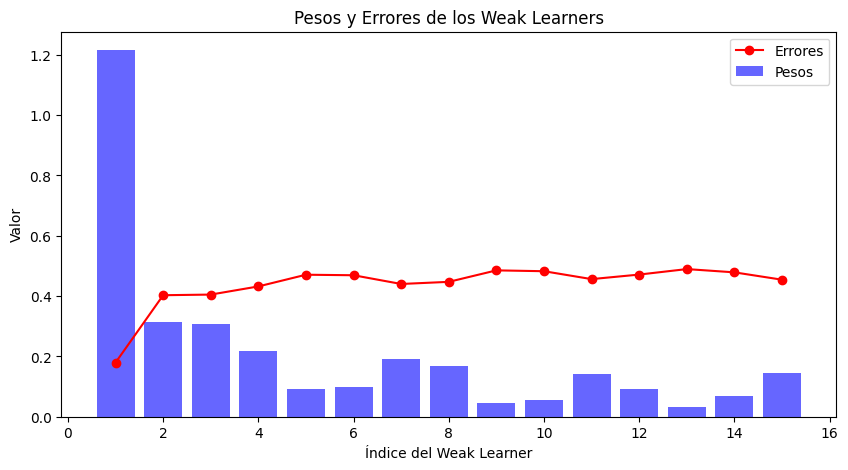

In [1042]:
# Importar bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from sklearn.naive_bayes import GaussianNB


ada_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=15,
    learning_rate=0.8,
    algorithm="SAMME",  # Cambiar a SAMME
    random_state=42
)


# Entrenar el modelo de AdaBoost
ada_model.fit(X_train, y_train)
# ada_model.fit(X_train_balanced, y_train_balanced)

# Obtener los pesos y errores de los weak learners
estimator_weights = ada_model.estimator_weights_
estimator_errors = ada_model.estimator_errors_

# Crear un DataFrame para mostrar los pesos y errores de los weak learners
estimator_data = {
    "Estimator Index": list(range(1, len(estimator_weights) + 1)),
    "Estimator Weight": estimator_weights,
    "Estimator Error": estimator_errors,
}
estimator_df = pd.DataFrame(estimator_data)

# Mostrar los resultados en la consola
print("Pesos y errores de los weak learners:")
print(estimator_df)

# Visualizar los pesos y errores
plt.figure(figsize=(10, 5))
plt.bar(estimator_data["Estimator Index"], estimator_weights, color="blue", alpha=0.6, label="Pesos")
plt.plot(estimator_data["Estimator Index"], estimator_errors, marker="o", color="red", label="Errores")
plt.xlabel("Índice del Weak Learner")
plt.ylabel("Valor")
plt.title("Pesos y Errores de los Weak Learners")
plt.legend()
plt.show()

In [1043]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
)

from utils.classification_utils import graficar_matrices_confusion, graficar_matriz_confusion

In [1044]:
X_test

array([[ 0.00000000e+00,  1.56250000e+00,  1.69093851e+00, ...,
         1.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 0.00000000e+00,  3.12500000e-02,  1.46278317e-01, ...,
         1.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 0.00000000e+00,  4.68750000e-01,  1.00000000e-01, ...,
         1.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       ...,
       [-1.80000000e+02,  9.21875000e-01,  2.55631068e+00, ...,
         1.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 0.00000000e+00,  1.71875000e-01, -2.53398058e-01, ...,
         1.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 0.00000000e+00, -3.59375000e-01,  5.31391586e-01, ...,
         1.00000000e+00,  1.00000000e+00,  0.00000000e+00]])

In [1045]:
y_pred_adaboost = ada_model.predict(X_test)

classification_report_adaboost = classification_report(y_test, y_pred_adaboost)
conf_matrix_adaboost = confusion_matrix(y_test, y_pred_adaboost)


In [1046]:
print("Repote Clasificación Adaboost")
print(classification_report_adaboost)
print("\n")

Repote Clasificación Adaboost
              precision    recall  f1-score   support

       False       0.93      0.42      0.57        65
        True       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185





In [1047]:
print(conf_matrix_adaboost)

[[ 27  38]
 [  2 118]]


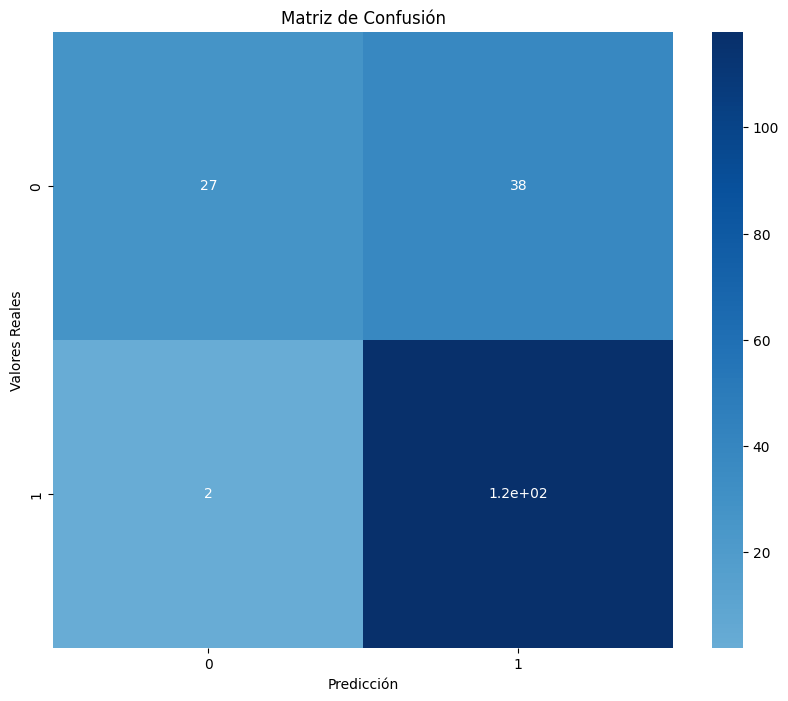

In [1048]:
graficar_matriz_confusion(conf_matrix_adaboost)

In [1049]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'estimator__max_depth': [1, 2, 3],
    'learning_rate': [0.1, 0.5, 1.0],
    'n_estimators': [50, 100, 200]
}

ada_model_to_optimize = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    algorithm="SAMME",  # Cambiar a SAMME
    random_state=42
)


# Perform grid search
grid_search = GridSearchCV(estimator=ada_model_to_optimize, param_grid=param_grid, cv=5, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END estimator__max_depth=1, learning_rate=0.1, n_estimators=50; total time=   0.0s
[CV] END estimator__max_depth=1, learning_rate=0.1, n_estimators=50; total time=   0.0s
[CV] END estimator__max_depth=1, learning_rate=0.1, n_estimators=50; total time=   0.0s
[CV] END estimator__max_depth=1, learning_rate=0.1, n_estimators=50; total time=   0.0s
[CV] END estimator__max_depth=1, learning_rate=0.1, n_estimators=50; total time=   0.0s
[CV] END estimator__max_depth=1, learning_rate=0.1, n_estimators=100; total time=   0.1s
[CV] END estimator__max_depth=1, learning_rate=0.1, n_estimators=100; total time=   0.1s
[CV] END estimator__max_depth=1, learning_rate=0.1, n_estimators=100; total time=   0.1s
[CV] END estimator__max_depth=1, learning_rate=0.1, n_estimators=100; total time=   0.1s
[CV] END estimator__max_depth=1, learning_rate=0.1, n_estimators=100; total time=   0.1s
[CV] END estimator__max_depth=1, learning_rate=0.1, n

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          estimator=DecisionTreeClassifier(max_depth=1),
                                          random_state=42),
             param_grid={'estimator__max_depth': [1, 2, 3],
                         'learning_rate': [0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [1050]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'estimator__max_depth': 1, 'learning_rate': 0.1, 'n_estimators': 50}


In [1051]:
ada_model_optimized = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    learning_rate=0.1,
    algorithm="SAMME",  # Cambiar a SAMME
    random_state=42
)

ada_model_optimized.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.1, random_state=42)

In [1052]:
y_pred_adaboost_opt = ada_model_optimized.predict(X_test)

classification_report_adaboost_opt = classification_report(y_test, y_pred_adaboost_opt)
conf_matrix_adaboost_opt = confusion_matrix(y_test, y_pred_adaboost_opt)

In [1053]:
print("Repote Clasificación Adaboost opt")
print(classification_report_adaboost_opt)
print("\n")

Repote Clasificación Adaboost opt
              precision    recall  f1-score   support

       False       0.93      0.42      0.57        65
        True       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185





In [1054]:
print(conf_matrix_adaboost_opt)

[[ 27  38]
 [  2 118]]


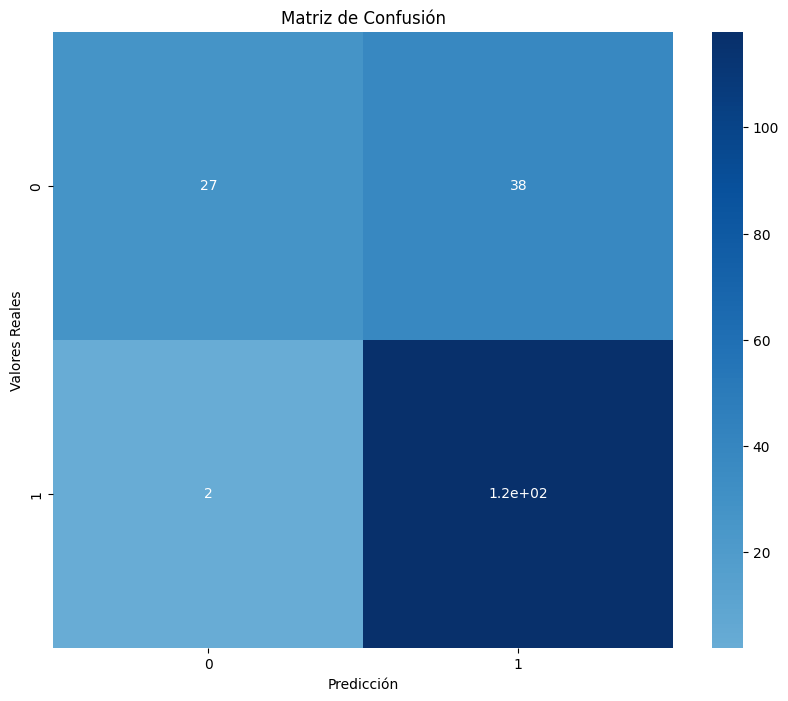

In [1055]:
graficar_matriz_confusion(conf_matrix_adaboost_opt)

In [1056]:
from sklearn.ensemble import GradientBoostingClassifier

logistic_init = LogisticRegression()

# Crear y entrenar un modelo de Gradient Boosting
model = GradientBoostingClassifier(
    n_estimators=20,  # Número de árboles (learners débiles son árboles de decisión en esta implementación)
    learning_rate=0.1, # Tasa de aprendizaje --> cuánto aprendizaje de lo obtenido en la iteración incorporo
    max_depth=3,       # Profundidad máxima de los árboles
    random_state=42,    # Semilla para reproducibilidad, pues fija el punto de partida
    # Dos parámetros que nos entregan para mover las métricas que vamos a optimizar
    # loss --> la función de pérdida a ser optimizada
    # criterion  --> la función para medir la calidad de splits en los árboles
)

# Entrenar el modelo
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo: {accuracy:.2f}")

# Mostrar un reporte de clasificación
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

Exactitud del modelo: 0.76
Reporte de Clasificación:
              precision    recall  f1-score   support

       False       0.92      0.35      0.51        65
        True       0.74      0.98      0.84       120

    accuracy                           0.76       185
   macro avg       0.83      0.67      0.68       185
weighted avg       0.80      0.76      0.73       185



In [1057]:


from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# Define models with their respective parameter grids for GridSearchCV
model_dict = {
    "LogisticRegression": (LogisticRegression(), {'classifier__C': [0.1, 1.0, 10.0], 'classifier__solver': ['liblinear', 'lbfgs']}),
    "SVC": (SVC(), {'classifier__C': [0.1, 1.0, 10.0], 'classifier__kernel': ['linear', 'rbf'], 'classifier__gamma': ['scale', 'auto']}),
    "RandomForestClassifier": (RandomForestClassifier(), {'classifier__n_estimators': [50, 100, 200], 'classifier__max_depth': [None, 10, 20]}),
    "XGBClassifier": (XGBClassifier(), {'classifier__learning_rate': [0.1, 0.01], 'classifier__max_depth': [3, 5, 7]}),
    "KNeighborsClassifier": (KNeighborsClassifier(), {'classifier__n_neighbors': [3, 5, 7], 'classifier__weights': ['uniform', 'distance']}),
    "GaussianNB": (GaussianNB(), {}),
    "AdaBoostClassifier": (AdaBoostClassifier(), {'classifier__n_estimators': [50, 100, 200], 'classifier__learning_rate': [0.01, 0.1, 1.0]}),
    "GradientBoostingClassifier": (GradientBoostingClassifier(), {'classifier__n_estimators': [50, 100, 200], 'classifier__learning_rate': [0.01, 0.1, 1.0], 'classifier__max_depth': [3, 5]}),
    "LGBMClassifier": (LGBMClassifier(verbose=-1), {'classifier__n_estimators': [50, 100, 200], 'classifier__learning_rate': [0.01, 0.1, 1.0]}),
    "HistGradientBoostingClassifier": (HistGradientBoostingClassifier(verbose=0), {'classifier__max_iter': [50, 100, 200], 'classifier__learning_rate': [0.01, 0.1, 1.0]})
}

# Perform GridSearchCV for each model with PCA
for model_name, (model, param_grid) in model_dict.items():
    print(f"Running GridSearchCV for {model_name} ...")

    # Create a pipeline 
    pipeline = Pipeline([
        ('classifier', model)
    ])

    # Initialize GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=2)

    # Fit GridSearchCV
    grid_search.fit(X_train, y_train)

    # Print best parameters and best score
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy for {model_name}: {grid_search.best_score_:.2f}")

    # Evaluate on validation set with best model
    best_model = grid_search.best_estimator_

    # Predict on validation set
    y_pred = best_model.predict(X_test)

    # Evaluate the model
    print(f"{model_name} Accuracy:", accuracy_score(y_test, y_pred))
    print(f"{model_name} Classification report\n", classification_report(y_test, y_pred))
    print("---------------------------")



Running GridSearchCV for LogisticRegression ...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ....classifier__C=0.1, classifier__solver=liblinear; total time=   0.0s
[CV] END ....classifier__C=0.1, classifier__solver=liblinear; total time=   0.0s
[CV] END ....classifier__C=0.1, classifier__solver=liblinear; total time=   0.0s
[CV] END ....classifier__C=0.1, classifier__solver=liblinear; total time=   0.0s
[CV] END ....classifier__C=0.1, classifier__solver=liblinear; total time=   0.0s
[CV] END ........classifier__C=0.1, classifier__solver=lbfgs; total time=   0.0s
[CV] END ........classifier__C=0.1, classifier__solver=lbfgs; total time=   0.0s
[CV] END ........classifier__C=0.1, classifier__solver=lbfgs; total time=   0.0s
[CV] END ........classifier__C=0.1, classifier__solver=lbfgs; total time=   0.0s
[CV] END ........classifier__C=0.1, classifier__solver=lbfgs; total time=   0.0s
[CV] END ....classifier__C=1.0, classifier__solver=liblinear; total time=   0.0s
[

/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

[CV] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=linear; total time=   0.4s
[CV] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=linear; total time=   0.5s
[CV] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=linear; total time=   0.0s
[CV] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=linear; total time=   0.5s
[CV] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=linear; total time=   0.1s
[CV] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=rbf; total time=   0.0s
[CV] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=rbf; total time=   0.0s
[CV] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=rbf; total time=   0.0s
[CV] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=rbf; total time=   0.0s
[CV] END classifier__C=0.1, classifier__gamma=scale, classifier__kernel=rbf; total time=   0.0s
[CV] END classifier__C=0.

/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the defa

[CV] END classifier__learning_rate=0.01, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__learning_rate=0.01, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__learning_rate=0.01, classifier__n_estimators=100; total time=   0.1s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier__learning_rate=0.01, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__learning_rate=0.01, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__learning_rate=0.01, classifier__n_estimators=100; total time=   0.1s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier__learning_rate=0.01, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__learning_rate=0.01, classifier__n_estimators=200; total time=   0.1s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier__learning_rate=0.01, classifier__n_estimators=200; total time=   0.1s
[CV] END classifier__learning_rate=0.01, classifier__n_estimators=200; total time=   0.1s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier__learning_rate=0.01, classifier__n_estimators=200; total time=   0.2s
[CV] END classifier__learning_rate=0.01, classifier__n_estimators=200; total time=   0.2s
[CV] END classifier__learning_rate=0.1, classifier__n_estimators=50; total time=   0.0s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the defa

[CV] END classifier__learning_rate=0.1, classifier__n_estimators=50; total time=   0.1s
[CV] END classifier__learning_rate=0.1, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__learning_rate=0.1, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__learning_rate=0.1, classifier__n_estimators=50; total time=   0.0s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__n_estimators=100; total time=   0.2s
[CV] END classifier__learning_rate=0.1, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__learning_rate=0.1, classifier__n_estimators=100; total time=   0.1s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__learning_rate=0.1, classifier__n_estimators=100; total time=   0.1s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__n_estimators=200; total time=   0.2s
[CV] END classifier__learning_rate=0.1, classifier__n_estimators=200; total time=   0.2s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__n_estimators=200; total time=   0.2s
[CV] END classifier__learning_rate=0.1, classifier__n_estimators=200; total time=   0.2s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier__learning_rate=0.1, classifier__n_estimators=200; total time=   0.2s
[CV] END classifier__learning_rate=1.0, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__learning_rate=1.0, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__learning_rate=1.0, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__learning_rate=1.0, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__learning_rate=1.0, classifier__n_estimators=50; total time=   0.0s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the defa

[CV] END classifier__learning_rate=1.0, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__learning_rate=1.0, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__learning_rate=1.0, classifier__n_estimators=100; total time=   0.1s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier__learning_rate=1.0, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__learning_rate=1.0, classifier__n_estimators=100; total time=   0.1s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier__learning_rate=1.0, classifier__n_estimators=200; total time=   0.1s
[CV] END classifier__learning_rate=1.0, classifier__n_estimators=200; total time=   0.1s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier__learning_rate=1.0, classifier__n_estimators=200; total time=   0.1s
[CV] END classifier__learning_rate=1.0, classifier__n_estimators=200; total time=   0.1s


/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier__learning_rate=1.0, classifier__n_estimators=200; total time=   0.1s
Best parameters for AdaBoostClassifier: {'classifier__learning_rate': 0.01, 'classifier__n_estimators': 50}
Best cross-validation accuracy for AdaBoostClassifier: 0.82
AdaBoostClassifier Accuracy: 0.7837837837837838
AdaBoostClassifier Classification report
               precision    recall  f1-score   support

       False       0.93      0.42      0.57        65
        True       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185

---------------------------
Running GridSearchCV for GradientBoostingClassifier ...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=50; total time=   0.0s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, c

/Users/diego/.pyenv/versions/ds_bootcamp_venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=100; total time=   0.1s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=200; total time=   0.1s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=200; total time=   0.1s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_estimators=200; total time=   0.1s
[CV] END classifier__learning_rate=0.01, classifier__max_depth=3, classifier__n_